In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading and reshaping data 

In [2]:
data=pd.read_csv("multiple_linear_regression.csv")
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Data preprocessing

In [3]:
data.shape

(200, 4)

In [4]:
data.dropna
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

## Splitting data

In [5]:
output_col="Target"

#input data
x=data.iloc[:,data.columns!=output_col]
#x = data.iloc[:, [0, 1]]
y = data.loc[:, output_col]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)
x_train

,Feature 1,Feature 2,Feature 3
71,109.8,14.3,31.7
90,134.3,4.9,9.3
100,222.4,4.3,49.8
44,25.1,25.7,43.3
94,107.4,14.0,10.9
...,...,...,...
58,210.8,49.6,37.7
21,237.4,5.1,23.5
49,66.9,11.7,36.8
64,131.1,42.8,28.9


In [7]:
print(data.shape)
print(x_train.shape)
print(x_test.shape)

(200, 4)
(140, 3)
(60, 3)


## Linear Regression
traing data

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_
lr.intercept_

3.077774495528047

Prediction data

In [9]:
pred_value=lr.predict(x_test)

## Cost

In [10]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(y_test,pred_value)
cost

2.241286253093347

## Visualization

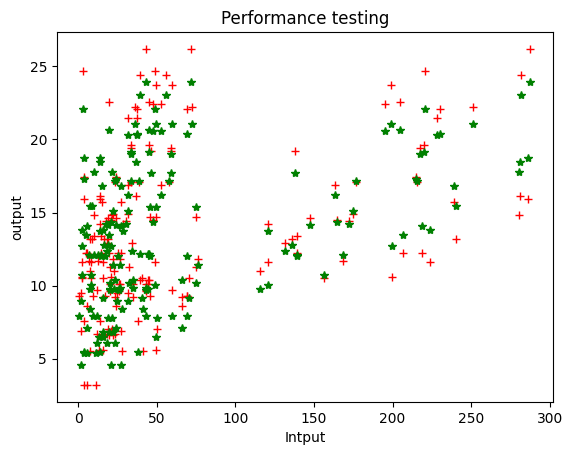

In [11]:
plt.plot(x_test,y_test,"+",color="red")
plt.plot(x_test,pred_value,"*",color="green")
plt.title("Performance testing")
plt.xlabel("Intput")
plt.ylabel("output")
plt.show()

### Assymption in Linear Regression Model

Homoscedasity

In [12]:
residual=y_test-pred_value

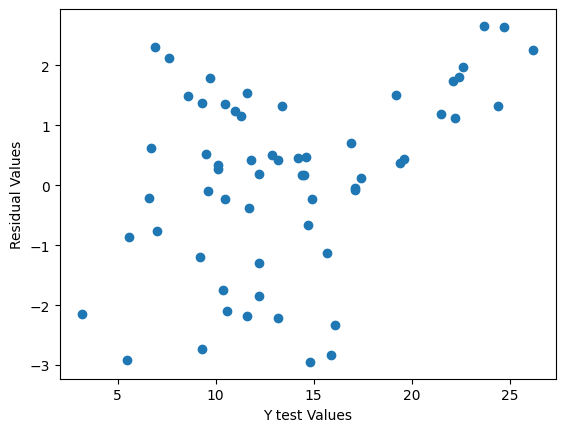

In [13]:
plt.scatter(y_test,residual)
plt.xlabel("Y test Values")
plt.ylabel("Residual Values")
plt.show()

# Normality

<Axes: xlabel='Target', ylabel='Count'>

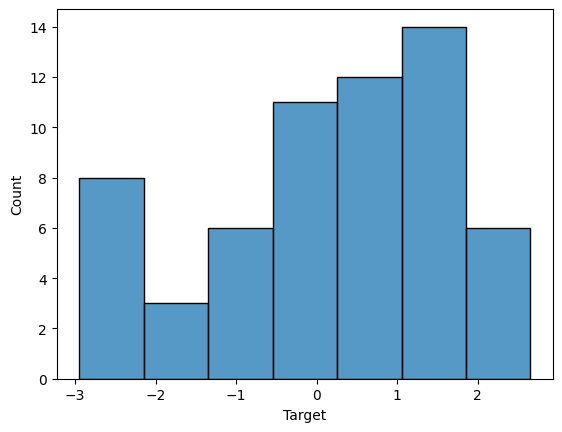

In [14]:
import seaborn as sns
sns.histplot(residual)

## Ordinary Least Square Method

In [16]:
import statsmodels.api as sm
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
x_with_constant=sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [18]:
model=sm.OLS(y_train,x_with_constant)
result=model.fit()
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [19]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [20]:
lr.intercept_

3.077774495528047

In [21]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.67e-63
Time:                        12:04:58   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

In [22]:
x_test=sm.add_constant(x_test)
y_pred=result.predict(x_test)
y_pred

56      8.417101
37     15.361461
67     12.086193
79      9.759531
80     11.377992
188    18.735263
183    23.941584
10      7.119317
128    22.066062
62     16.831729
65      7.931159
17     23.072438
133    19.157298
195     5.476775
146    15.421023
38      9.822057
173    12.080236
149     9.760949
93     21.077177
29      9.139450
0      20.362058
2      12.038627
122    13.780821
180    10.732255
95     16.200615
121     7.770427
185    20.625121
39     20.319663
66      8.972660
19     14.137462
11     17.283814
45     15.138272
41     17.183768
92     19.033746
168    17.139522
1      12.146705
57     12.781595
189     6.081355
151    10.066350
167    13.489216
116    12.015498
138     9.701073
155     5.353987
82     10.149662
160    14.224196
181    14.047809
171    14.330535
12     10.394657
55     21.044180
77     13.747035
22      6.465117
129     7.905508
105    17.698666
102    17.746682
159    12.394989
9      12.693458
15     20.589467
150    18.426901
76      4.5914